<a href="https://www.kaggle.com/code/soumyadeepsarkar12/notebookc46dd2cdb0?scriptVersionId=162365340" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kriti-24/sample_submission.csv
/kaggle/input/kriti-24/train.csv
/kaggle/input/kriti-24/test.csv
/kaggle/input/newdata/cleandata.csv
/kaggle/input/clean-train/df (2).csv


In [122]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import os
import torch
import re
import string
import json

import emoji
import numpy as np
import pandas as pd
from sklearn import metrics
from bs4 import BeautifulSoup
import torch.nn as nn
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, AutoTokenizer, BertModel, BertConfig, AutoModel, AdamW


In [123]:
df=pd.read_csv('/kaggle/input/newdata/cleandata.csv')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51210 entries, 0 to 51209
Data columns (total 58 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      51210 non-null  object
 1   q-bio.GN  51210 non-null  int64 
 2   stat.AP   51210 non-null  int64 
 3   q-fin.TR  51210 non-null  int64 
 4   math.GR   51210 non-null  int64 
 5   q-bio.NC  51210 non-null  int64 
 6   math.NT   51210 non-null  int64 
 7   q-fin.MF  51210 non-null  int64 
 8   cs.SE     51210 non-null  int64 
 9   math.LO   51210 non-null  int64 
 10  econ.EM   51210 non-null  int64 
 11  q-fin.PM  51210 non-null  int64 
 12  cs.CE     51210 non-null  int64 
 13  q-bio.MN  51210 non-null  int64 
 14  cs.CV     51210 non-null  int64 
 15  math.PR   51210 non-null  int64 
 16  eess.SP   51210 non-null  int64 
 17  math.AT   51210 non-null  int64 
 18  cs.SD     51210 non-null  int64 
 19  stat.CO   51210 non-null  int64 
 20  q-fin.EC  51210 non-null  int64 
 21  cs.OS     51

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


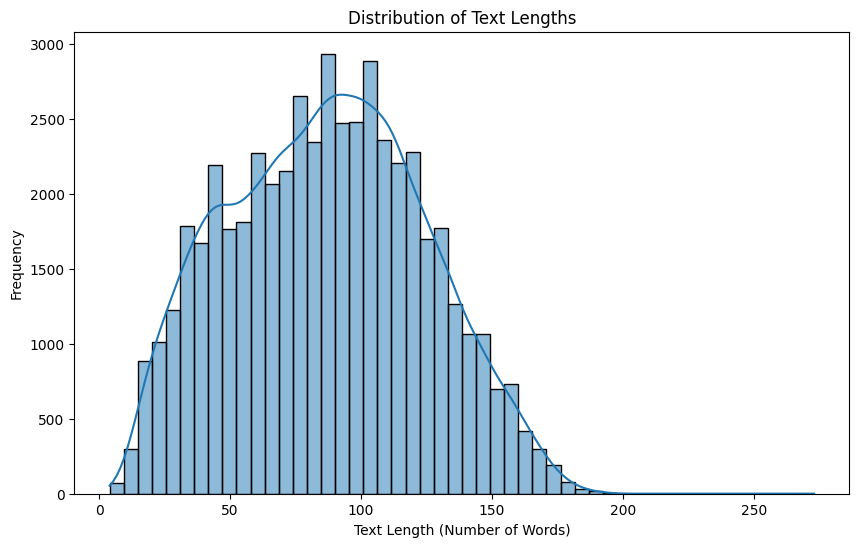

count    51210.000000
mean        86.771783
std         37.285616
min          4.000000
25%         58.000000
50%         87.000000
75%        114.000000
max        273.000000
Name: text_length, dtype: float64

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['text_length'] = df['Text'].apply(lambda x: len(x.split()))

# Plot distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

# Display basic statistics of text lengths
text_length_stats = df['text_length'].describe()
text_length_stats

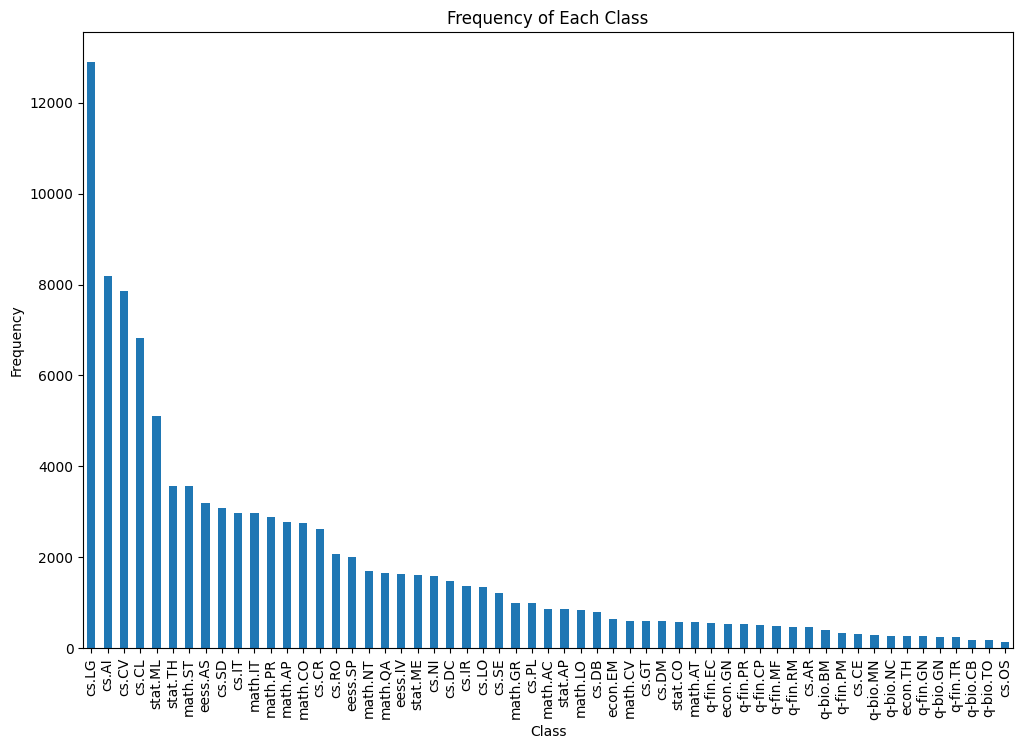

cs.LG       12905
cs.AI        8198
cs.CV        7856
cs.CL        6818
stat.ML      5106
stat.TH      3567
math.ST      3567
eess.AS      3199
cs.SD        3087
cs.IT        2967
math.IT      2967
math.PR      2893
math.AP      2769
math.CO      2756
cs.CR        2630
cs.RO        2080
eess.SP      1996
math.NT      1690
math.QA      1657
eess.IV      1633
stat.ME      1614
cs.NI        1584
cs.DC        1489
cs.IR        1368
cs.LO        1345
cs.SE        1225
math.GR       991
cs.PL         984
math.AC       858
stat.AP       858
math.LO       832
cs.DB         792
econ.EM       635
math.CV       600
cs.GT         595
cs.DM         590
stat.CO       575
math.AT       569
q-fin.EC      548
econ.GN       539
q-fin.PR      524
q-fin.CP      501
q-fin.MF      485
q-fin.RM      475
cs.AR         465
q-bio.BM      394
q-fin.PM      332
cs.CE         312
q-bio.MN      281
q-bio.NC      273
econ.TH       272
q-fin.GN      272
q-bio.GN      257
q-fin.TR      241
q-bio.CB      191
q-bio.TO  

In [126]:
# Calculate the frequency of each class
class_frequencies = df.iloc[:, 1:-1].sum().sort_values(ascending=False)

# Plot class frequencies
plt.figure(figsize=(12, 8))
class_frequencies.plot(kind='bar')
plt.title('Frequency of Each Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

class_frequencies

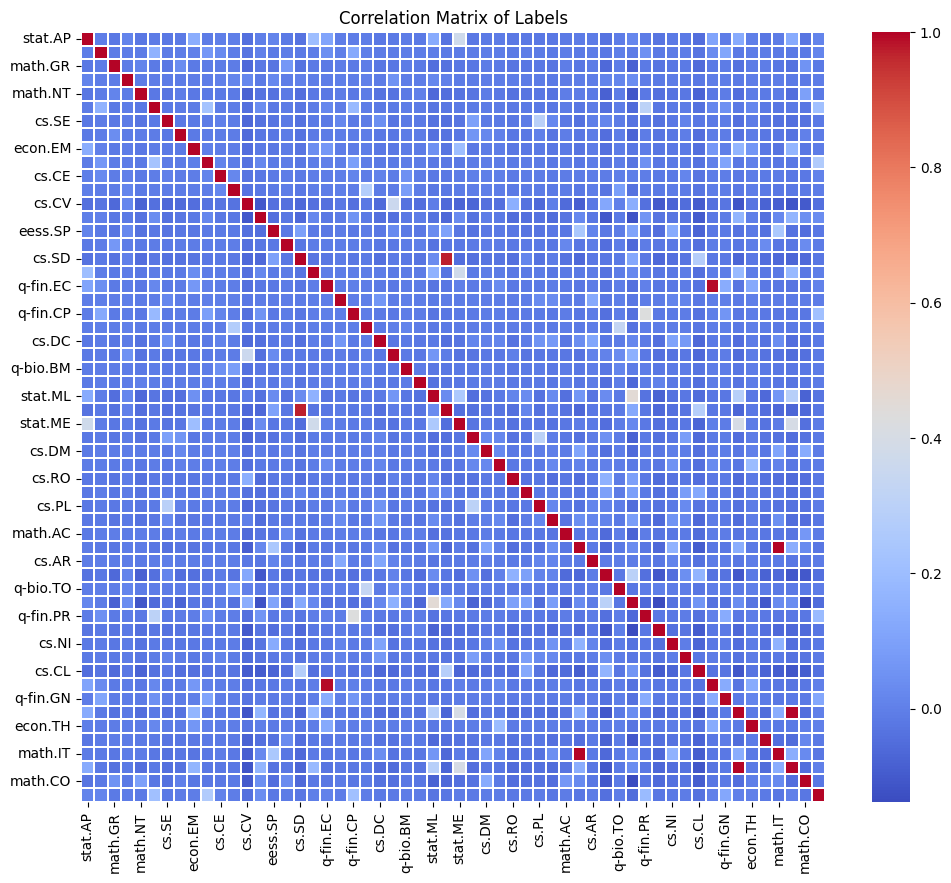

In [127]:
# Calculate the correlation matrix for the label columns
label_correlation = df.iloc[:, 2:-1].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(label_correlation, cmap='coolwarm', linewidths=.1)
plt.title('Correlation Matrix of Labels')
plt.show()

In [128]:
df=df.drop(['text_length'],axis=1)

In [129]:
target_cols = [col for col in df.columns if col not in ['Text']]
len(target_cols)

57

In [130]:
df

,Text,q-bio.GN,stat.AP,q-fin.TR,math.GR,q-bio.NC,math.NT,q-fin.MF,cs.SE,math.LO,...,cs.CL,econ.GN,q-fin.GN,math.ST,econ.TH,math.QA,math.IT,stat.TH,math.CO,q-fin.RM
0,axiomatic aspects default inference paper stud...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,extensions group infinite conjugacy classes ch...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,complexvalued cnns rf datadriven wireless devi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,reconstruction drift diffusion transition prob...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,three classes propagation rules grs egrs codes...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51205,generalized fourier integral operators spaces ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51206,weaklysupervised 3d visual grounding visual li...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
51207,strongly pseudoconvex handlebodies explicit co...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51208,improving endtoend speech processing efficient...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [131]:
target_dict = {index: column for index, column in enumerate(target_cols)}

# Display the resulting dictionary
print(target_dict)

{0: 'q-bio.GN', 1: 'stat.AP', 2: 'q-fin.TR', 3: 'math.GR', 4: 'q-bio.NC', 5: 'math.NT', 6: 'q-fin.MF', 7: 'cs.SE', 8: 'math.LO', 9: 'econ.EM', 10: 'q-fin.PM', 11: 'cs.CE', 12: 'q-bio.MN', 13: 'cs.CV', 14: 'math.PR', 15: 'eess.SP', 16: 'math.AT', 17: 'cs.SD', 18: 'stat.CO', 19: 'q-fin.EC', 20: 'cs.OS', 21: 'q-fin.CP', 22: 'q-bio.CB', 23: 'cs.DC', 24: 'eess.IV', 25: 'q-bio.BM', 26: 'math.CV', 27: 'stat.ML', 28: 'eess.AS', 29: 'stat.ME', 30: 'cs.LO', 31: 'cs.DM', 32: 'cs.GT', 33: 'cs.RO', 34: 'cs.IR', 35: 'cs.PL', 36: 'cs.CR', 37: 'math.AC', 38: 'cs.IT', 39: 'cs.AR', 40: 'cs.AI', 41: 'q-bio.TO', 42: 'cs.LG', 43: 'q-fin.PR', 44: 'math.AP', 45: 'cs.NI', 46: 'cs.DB', 47: 'cs.CL', 48: 'econ.GN', 49: 'q-fin.GN', 50: 'math.ST', 51: 'econ.TH', 52: 'math.QA', 53: 'math.IT', 54: 'stat.TH', 55: 'math.CO', 56: 'q-fin.RM'}


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51210 entries, 0 to 51209
Data columns (total 58 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      51210 non-null  object
 1   q-bio.GN  51210 non-null  int64 
 2   stat.AP   51210 non-null  int64 
 3   q-fin.TR  51210 non-null  int64 
 4   math.GR   51210 non-null  int64 
 5   q-bio.NC  51210 non-null  int64 
 6   math.NT   51210 non-null  int64 
 7   q-fin.MF  51210 non-null  int64 
 8   cs.SE     51210 non-null  int64 
 9   math.LO   51210 non-null  int64 
 10  econ.EM   51210 non-null  int64 
 11  q-fin.PM  51210 non-null  int64 
 12  cs.CE     51210 non-null  int64 
 13  q-bio.MN  51210 non-null  int64 
 14  cs.CV     51210 non-null  int64 
 15  math.PR   51210 non-null  int64 
 16  eess.SP   51210 non-null  int64 
 17  math.AT   51210 non-null  int64 
 18  cs.SD     51210 non-null  int64 
 19  stat.CO   51210 non-null  int64 
 20  q-fin.EC  51210 non-null  int64 
 21  cs.OS     51

In [133]:
class_frequencies = {
    'cs.LG': 12905,
    'cs.AI': 8198,
    'cs.CV': 7856,
    'cs.CL': 6818,
    'stat.ML': 5106,
    'stat.TH': 3567,
    'math.ST': 3567,
    'eess.AS': 3199,
    'cs.SD': 3087,
    'cs.IT': 2967,
    'math.IT': 2967,
    'math.PR': 2893,
    'math.AP': 2769,
    'math.CO': 2756,
    'cs.CR': 2630,
    'cs.RO': 2080,
    'eess.SP': 1996,
    'math.NT': 1690,
    'math.QA': 1657,
    'eess.IV': 1633,
    'stat.ME': 1614,
    'cs.NI': 1584,
    'cs.DC': 1489,
    'cs.IR': 1368,
    'cs.LO': 1345,
    'cs.SE': 1225,
    'math.GR': 991,
    'cs.PL': 984,
    'math.AC': 858,
    'stat.AP': 858,
    'math.LO': 832,
    'cs.DB': 792,
    'econ.EM': 635,
    'math.CV': 600,
    'cs.GT': 595,
    'cs.DM': 590,
    'stat.CO': 575,
    'math.AT': 569,
    'q-fin.EC': 548,
    'econ.GN': 539,
    'q-fin.PR': 524,
    'q-fin.CP': 501,
    'q-fin.MF': 485,
    'q-fin.RM': 475,
    'cs.AR': 465,
    'q-bio.BM': 394,
    'q-fin.PM': 332,
    'cs.CE': 312,
    'q-bio.MN': 281,
    'q-bio.NC': 273,
    'econ.TH': 272,
    'q-fin.GN': 272,
    'q-bio.GN': 257,
    'q-fin.TR': 241,
    'q-bio.CB': 191,
    'q-bio.TO': 177,
    'cs.OS': 134
}


In [134]:
frequency_threshold = 600
minority_classes = [class_name for class_name in target_cols if class_frequencies[class_name] < frequency_threshold]

In [135]:
minority_classes

['q-bio.GN',
 'q-fin.TR',
 'q-bio.NC',
 'q-fin.MF',
 'q-fin.PM',
 'cs.CE',
 'q-bio.MN',
 'math.AT',
 'stat.CO',
 'q-fin.EC',
 'cs.OS',
 'q-fin.CP',
 'q-bio.CB',
 'q-bio.BM',
 'cs.DM',
 'cs.GT',
 'cs.AR',
 'q-bio.TO',
 'q-fin.PR',
 'econ.GN',
 'q-fin.GN',
 'econ.TH',
 'q-fin.RM']

In [136]:
total_samples = sum(class_frequencies.values())

# Number of classes
num_classes = len(class_frequencies)

# Calculate class weights
class_weights = {class_label: (total_samples / (num_classes * freq)) for class_label, freq in class_frequencies.items()}

# Normalize the weights to make them sum up to 1 (optional, but can be useful)
weight_sum = sum(class_weights.values())
normalized_class_weights = {k: v / weight_sum for k, v in class_weights.items()}

print("Class Weights:", class_weights)
print("Normalized Class Weights:", normalized_class_weights)

Class Weights: {'cs.LG': 0.1420882698804353, 'cs.AI': 0.2236703004155913, 'cs.CV': 0.23340747489906027, 'cs.CL': 0.2689423764750686, 'stat.ML': 0.3591165536245628, 'stat.TH': 0.5140591877788107, 'math.ST': 0.5140591877788107, 'eess.AS': 0.573194474150365, 'cs.SD': 0.5939906455481107, 'cs.IT': 0.6180145341445964, 'math.IT': 0.6180145341445964, 'math.PR': 0.6338227178731481, 'math.AP': 0.6622062559794213, 'math.CO': 0.6653298703944186, 'cs.CR': 0.697204989660463, 'cs.RO': 0.8815620782726046, 'eess.SP': 0.9186618851738565, 'math.NT': 1.084999480950898, 'math.QA': 1.1066077989179346, 'eess.IV': 1.122871477530323, 'stat.ME': 1.136089914998152, 'cs.NI': 1.1576067694488748, 'cs.DC': 1.231463480730032, 'cs.IR': 1.3403867856776444, 'cs.LO': 1.3633078979977826, 'cs.SE': 1.4968564267812388, 'math.GR': 1.850301839361269, 'cs.PL': 1.8634645556981886, 'math.AC': 2.137120189751769, 'stat.AP': 2.137120189751769, 'math.LO': 2.2039051956815117, 'cs.DB': 2.3152135388977495, 'econ.EM': 2.887636413869319, 

In [137]:
import torch.nn.functional as F
# # class_weights = {class_name: 1.0 / np.log(frequency + 1) for class_name, frequency in class_frequencies.items()}
# class_weights = {class_name: 1.0 / frequency for class_name, frequency in class_frequencies.items()}

In [138]:
weights_tensor = torch.tensor([normalized_class_weights[class_name] for class_name in target_cols], dtype=torch.float)

# If using a GPU, move the tensor to the same device as your model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
weights_tensor = weights_tensor.to(device)

print(weights_tensor)

tensor([0.0425, 0.0127, 0.0453, 0.0110, 0.0400, 0.0065, 0.0225, 0.0089, 0.0131,
        0.0172, 0.0329, 0.0350, 0.0389, 0.0014, 0.0038, 0.0055, 0.0192, 0.0035,
        0.0190, 0.0199, 0.0815, 0.0218, 0.0572, 0.0073, 0.0067, 0.0277, 0.0182,
        0.0021, 0.0034, 0.0068, 0.0081, 0.0185, 0.0184, 0.0053, 0.0080, 0.0111,
        0.0042, 0.0127, 0.0037, 0.0235, 0.0013, 0.0617, 0.0008, 0.0208, 0.0039,
        0.0069, 0.0138, 0.0016, 0.0203, 0.0402, 0.0031, 0.0402, 0.0066, 0.0037,
        0.0031, 0.0040, 0.0230], device='cuda:0')


In [139]:
# class_weights 

In [140]:
# weights_tensor = torch.tensor([class_weights[class_name] for class_name in target_cols], dtype=torch.float)


In [141]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
weights_tensor = weights_tensor.to(device)

In [142]:
weights_tensor

tensor([0.0425, 0.0127, 0.0453, 0.0110, 0.0400, 0.0065, 0.0225, 0.0089, 0.0131,
        0.0172, 0.0329, 0.0350, 0.0389, 0.0014, 0.0038, 0.0055, 0.0192, 0.0035,
        0.0190, 0.0199, 0.0815, 0.0218, 0.0572, 0.0073, 0.0067, 0.0277, 0.0182,
        0.0021, 0.0034, 0.0068, 0.0081, 0.0185, 0.0184, 0.0053, 0.0080, 0.0111,
        0.0042, 0.0127, 0.0037, 0.0235, 0.0013, 0.0617, 0.0008, 0.0208, 0.0039,
        0.0069, 0.0138, 0.0016, 0.0203, 0.0402, 0.0031, 0.0402, 0.0066, 0.0037,
        0.0031, 0.0040, 0.0230], device='cuda:0')

In [143]:
# def custom_loss(outputs, targets, weights_tensor):
#     bce_loss = F.binary_cross_entropy_with_logits(outputs, targets, reduction='none')
#     weighted_loss = bce_loss * weights_tensor.expand_as(bce_loss)
#     return weighted_loss.mean()
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [144]:
# import torch
# import pandas as pd
# from torch.utils.data import Dataset, DataLoader
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
# from sklearn.metrics import accuracy_score, f1_score
# from sklearn.model_selection import train_test_split
# import os
# import torch
# import re
# import string
# import json

# import emoji
# import numpy as np
# import pandas as pd
# from sklearn import metrics
# from bs4 import BeautifulSoup
# import torch.nn as nn
# import transformers
# import torch
# from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
# from transformers import BertTokenizer, AutoTokenizer, BertModel, BertConfig, AutoModel, AdamW


In [145]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df, test_size=0.13, random_state=42)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [146]:
print(df_train.shape,df_test.shape)

(44552, 58) (6658, 58)


In [147]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
MAX_LEN = 200
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 6e-5
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')

In [149]:
class BERTDataset(Dataset):
    def __init__(self, df, tokenizer, max_len):
        self.df = df
        self.max_len = max_len
        self.text = df.Text
        self.tokenizer = tokenizer
        self.targets = df[target_cols].values
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        text = self.text[index]
        inputs = self.tokenizer.encode_plus(
            text,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]
        
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [150]:
train_dataset = BERTDataset(df_train, tokenizer, MAX_LEN)
test_dataset = BERTDataset(df_test, tokenizer, MAX_LEN)

In [151]:
train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, 
                          num_workers=4, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=VALID_BATCH_SIZE, 
                          num_workers=4, shuffle=False, pin_memory=True)

In [152]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from transformers import AutoModel


In [153]:
class MultiLabelSciBERT(torch.nn.Module):
    def __init__(self, num_labels):
        super(MultiLabelSciBERT, self).__init__()
        self.sci_bert = AutoModel.from_pretrained('allenai/scibert_scivocab_uncased')
        self.classifier = torch.nn.Linear(768, num_labels)

    def forward(self, ids,mask):
        outputs = self.sci_bert(ids, attention_mask=mask)
        sequence_output = outputs[0][:, 0, :]  
        return self.classifier(sequence_output)
    
    
    


In [154]:
 model = MultiLabelSciBERT(57)
 model.to(device);

In [155]:
 model

MultiLabelSciBERT(
  (sci_bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31090, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [156]:
from torch.optim import AdamW
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-6)



In [157]:
import torch
from torch.cuda.amp import autocast
import torch
from torch.cuda.amp import GradScaler

# Define the GradScaler object
scaler = GradScaler()
def train(epoch):
    model.train()
    for _, data in enumerate(train_loader, 0):
        ids = data['ids'].to(device, dtype=torch.long)
        mask = data['mask'].to(device, dtype=torch.long)
        targets = data['targets'].to(device, dtype=torch.float)

        optimizer.zero_grad()

        with autocast():
            outputs = model(ids, mask)
            loss = loss_fn(outputs, targets )

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        if _ % 500 == 0:
            print(f'Epoch: {epoch}, Loss: {loss.item()}')


In [158]:
for epoch in range(EPOCHS):
    train(epoch) 

Epoch: 0, Loss: 0.7281152606010437
Epoch: 0, Loss: 0.058994367718696594
Epoch: 0, Loss: 0.056077804416418076
Epoch: 1, Loss: 0.04121147096157074
Epoch: 1, Loss: 0.062308020889759064
Epoch: 1, Loss: 0.03105204924941063
Epoch: 2, Loss: 0.03622863069176674
Epoch: 2, Loss: 0.04072780907154083
Epoch: 3, Loss: 0.03220965340733528
Epoch: 3, Loss: 0.022679191082715988
Epoch: 3, Loss: 0.027243906632065773
Epoch: 4, Loss: 0.020988376811146736


KeyboardInterrupt: 

In [65]:
model

MultiLabelSciBERT(
  (sci_bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31090, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [160]:
torch.save(model.state_dict(), 'model5.pth')


In [161]:
def validation():
    model.eval() 
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in enumerate(test_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask)
#              outputs = model(ids, mask)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [162]:
outputs, targets = validation()
outputs = np.array(outputs) >= 0.5
accuracy = metrics.accuracy_score(targets, outputs)
f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
print(f"Accuracy Score = {accuracy}")
print(f"F1 Score (Micro) = {f1_score_micro}")
print(f"F1 Score (Macro) = {f1_score_macro}")

Accuracy Score = 0.4348152598377891
F1 Score (Micro) = 0.7290890114805427
F1 Score (Macro) = 0.6641165628397604


In [151]:
import pandas as pd
# Load the test dataset
test_df = pd.read_csv("/kaggle/input/kriti-24/test.csv")

# Preprocess the text data
test_df['Text'] = test_df['Title'] + ' ' + test_df['Abstract']
test_df = test_df.drop(['Title', 'Abstract'], axis=1)
test_df['Text']=test_df['Text'].str.lower()


In [152]:
def remove_punct(text):
    punctuation =string.punctuation
    return text.translate(str.maketrans('' , '',punctuation))
test_df['Text']=test_df['Text'].apply(lambda x: remove_punct(x))

In [153]:
from nltk.corpus import stopwords 
",".join(stopwords.words('english'))
STOPWRDS=set(stopwords.words('english'))

In [154]:
def remove_stp(Text):
    return " ".join([word for word in Text.split() if word not in STOPWRDS])

In [155]:
test_df['Text']=test_df['Text'].apply(lambda x: remove_stp(x))

In [156]:
not_needed = [
     "using", "results", "performance", "show", "method", "approach",
    "also", "based", "problem", "proposed", "two", "information", "new", "large",
    "different", "study", "however",  "analysis", "one", "work", "used", "first",
    "set", "use", "existing", "present", "process", "demonstrate", "task", "general",
    "several", "due", "compared", "via", "moreover", "eg", "thus", "possible", "make",
    "like", "important", "key", "furthermore", "give", "state", "certain", "ie", "form",
    "allows", "finally", "often", "even", "many", "various", "well", "also", "however",
    "several", "due", "across", "may", "without", "among", "including", "particular",
    "especially", "either", "often", "even", "moreover", "thus", "ie", "eg", "although",
    "despite","would" ,"within" ,"",
]

import pandas as pd
def not_need(Text):
    return " ".join([word for word in Text.split() if word not in not_needed])

test_df['Text'] = test_df['Text'].apply(lambda x:not_need(x))

In [157]:
class BERTTestDatasets(Dataset):
    def __init__(self, df, tokenizer, max_len):
        self.df = df
        self.max_len = max_len
        self.text = df.Text
        self.tokenizer = tokenizer
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        text = self.text[index]
        inputs = self.tokenizer.encode_plus(
            text,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]
        
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long)
        }

# Create the test dataset
result_dataset = BERTTestDatasets(test_df, tokenizer, MAX_LEN)


In [158]:
result_loader = DataLoader(result_dataset, batch_size=VALID_BATCH_SIZE, shuffle=False, num_workers=4)


In [160]:
def predict():
    model.eval()
    predictions = []
    with torch.no_grad():
        for _, data in enumerate(result_loader, 0):
            ids = data['ids'].to(device, dtype=torch.long)
            mask = data['mask'].to(device, dtype=torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)

            outputs = model(ids, mask)
            predictions.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return predictions

# Get predictions
test_predictions = predict()


In [ ]:
import numpy as np
import pandas as pd

# Convert predictions to binary (True/False)
binary_predictions = np.array(test_predictions) >= 0.5

# Convert boolean values to integers (1/0)
binary_predictions_int = binary_predictions.astype(int)

# Create a DataFrame for submission
submission_df = pd.DataFrame(binary_predictions_int, columns=target_cols)
submission_df.insert(0, 'Id', test_df.Id)
submission_df.to_csv('/kaggle/working/submission.csv', index=False)


In [162]:
target_cols2 = [col for col in df.columns if col not in ['Text','Title','Abstract']]
len(target_cols2)

57

In [163]:
import numpy as np
import pandas as pd

# Convert predictions to binary (True/False)
binary_predictions = np.array(test_predictions) >= 0.5

# Convert boolean values to integers (1/0)
binary_predictions_int = binary_predictions.astype(int)

# Create a DataFrame for submission
submission_df = pd.DataFrame(binary_predictions_int, columns=target_cols2)
submission_df.insert(0, 'Id', test_df.Id)
submission_df.to_csv('/kaggle/working/submission.csv', index=False)


In [164]:
template_df = pd.read_csv('/kaggle/input/kriti-24/sample_submission.csv')
required_column_order = template_df.columns.tolist()


In [165]:
# Ensure that 'Id' is the first column
required_column_order.remove('Id')
required_column_order.insert(0, 'Id')

# Reorder your DataFrame columns
submission_df = submission_df[required_column_order]


In [166]:
submission_df
submission_df.to_csv('/kaggle/working/submission.csv', index=False)


In [167]:
submission_df

,Id,math.AT,stat.AP,cs.AR,math.QA,q-bio.MN,eess.AS,eess.IV,stat.ME,econ.GN,...,cs.SE,cs.RO,stat.TH,cs.DB,math.ST,q-bio.GN,q-fin.PM,q-bio.TO,math.GR,cs.IR
0,30332,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50337,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,66515,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57464,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,43169,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10969,41708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10970,38843,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10971,57571,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10972,31964,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assume 'y_true' contains your true labels and 'y_pred' contains your model predictions
y_true = targets  # Example true labels
y_pred = outputs  # Example predictions

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

NameError: name 'targets' is not defined

In [2]:
model_news= MultiLabelSciBERT(57)
model_path = '/kaggle/working/model1.pth'
loaded_st = torch.load(model_path)
model_news.load_state_dict(loaded_st)

NameError: name 'MultiLabelSciBERT' is not defined